In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
plastic = pd.read_excel(r"C:\Users\aishw\Desktop\PROJECT\AISH_PLASTIC.xlsx")
plastic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8504 entries, 0 to 8503
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DOCNUM                      8504 non-null   object        
 1   POSTING DATE                8504 non-null   datetime64[ns]
 2   EFFECTIVE DATE              8504 non-null   datetime64[ns]
 3   CREATE DATE                 8504 non-null   datetime64[ns]
 4   TRANSFER IN EFFECTIVE DATE  0 non-null      float64       
 5   Customer/Vendor Code        8504 non-null   int64         
 6   Customer/Vendor Name        8504 non-null   object        
 7   LOB                         8504 non-null   object        
 8   Region                      8504 non-null   object        
 9   BP TYPE                     8504 non-null   object        
 10  City                        8501 non-null   object        
 11  STATE                       8501 non-null   object      

In [3]:
plastic1 = plastic[['EFFECTIVE DATE', 'Customer/Vendor Name', 'Region', 'STATE', 'City', 'From WhsName','QUANTITY']]

In [4]:
plastic1

,EFFECTIVE DATE,Customer/Vendor Name,Region,STATE,City,From WhsName,QUANTITY
0,2021-11-01,LUACT PVT LTD_Pondi _ Puducherry,South,Pondicherry,Pondicherry,branch_Chennai,39
1,2021-11-01,LUACT PVT LTD_Pondi _ Puducherry,South,Pondicherry,Pondicherry,branch_Chennai,10
2,2021-11-01,BRAC PRIVATE LIMITED,South,Tamil Nadu,Chennai,branch_Chennai,15
3,2021-11-01,TURBINE PVT LTD _ Vellore,South,Tamil Nadu,Vellore,branch_Chennai,5
4,2021-11-01,TURBINE PVT LTD _ Vellore_2,South,Tamil Nadu,Vellore,branch_Chennai,10
...,...,...,...,...,...,...,...
8499,2022-10-31,BRAC PRIVATE LIMITED,South,Tamil Nadu,Chennai,branch_Chennai,5
8500,2022-10-31,Maha AM Ltd _Nagpur,West,Maharashtra,Nagpur,branch_Nagpur,2
8501,2022-10-31,Vibrate Pvt Ltd _ Noida,North,Uttar Pradesh,Noida,branch_Pataudi Gadaipur,7
8502,2022-10-31,MT INDUSTRIES PVT LTD. UNIT_ II _ AURANGABAD,West,Maharashtra,Aurangabad,branch_pune,5


In [5]:
plastic1.isna().sum()

EFFECTIVE DATE          0
Customer/Vendor Name    0
Region                  0
STATE                   3
City                    3
From WhsName            0
QUANTITY                0
dtype: int64

In [6]:
plastic1 = plastic1.dropna()

In [7]:
plastic1

,EFFECTIVE DATE,Customer/Vendor Name,Region,STATE,City,From WhsName,QUANTITY
0,2021-11-01,LUACT PVT LTD_Pondi _ Puducherry,South,Pondicherry,Pondicherry,branch_Chennai,39
1,2021-11-01,LUACT PVT LTD_Pondi _ Puducherry,South,Pondicherry,Pondicherry,branch_Chennai,10
2,2021-11-01,BRAC PRIVATE LIMITED,South,Tamil Nadu,Chennai,branch_Chennai,15
3,2021-11-01,TURBINE PVT LTD _ Vellore,South,Tamil Nadu,Vellore,branch_Chennai,5
4,2021-11-01,TURBINE PVT LTD _ Vellore_2,South,Tamil Nadu,Vellore,branch_Chennai,10
...,...,...,...,...,...,...,...
8499,2022-10-31,BRAC PRIVATE LIMITED,South,Tamil Nadu,Chennai,branch_Chennai,5
8500,2022-10-31,Maha AM Ltd _Nagpur,West,Maharashtra,Nagpur,branch_Nagpur,2
8501,2022-10-31,Vibrate Pvt Ltd _ Noida,North,Uttar Pradesh,Noida,branch_Pataudi Gadaipur,7
8502,2022-10-31,MT INDUSTRIES PVT LTD. UNIT_ II _ AURANGABAD,West,Maharashtra,Aurangabad,branch_pune,5


In [8]:
plastic1.isna().sum()

EFFECTIVE DATE          0
Customer/Vendor Name    0
Region                  0
STATE                   0
City                    0
From WhsName            0
QUANTITY                0
dtype: int64

In [9]:
plastic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8501 entries, 0 to 8503
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EFFECTIVE DATE        8501 non-null   datetime64[ns]
 1   Customer/Vendor Name  8501 non-null   object        
 2   Region                8501 non-null   object        
 3   STATE                 8501 non-null   object        
 4   City                  8501 non-null   object        
 5   From WhsName          8501 non-null   object        
 6   QUANTITY              8501 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 531.3+ KB


In [10]:
#plastic1 = plastic1.convert_dtypes()

In [11]:
#plastic1.info()

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [13]:
plastic1['Customer/Vendor Name']= label_encoder.fit_transform(plastic1['Customer/Vendor Name'])
plastic1['Region']= label_encoder.fit_transform(plastic1['Region'])
plastic1['STATE']= label_encoder.fit_transform(plastic1['STATE'])
plastic1['City']= label_encoder.fit_transform(plastic1['City'])
plastic1['From WhsName']= label_encoder.fit_transform(plastic1['From WhsName'])

C:\Users\aishw\AppData\Local\Temp\ipykernel_8620\3417158337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plastic1['Customer/Vendor Name']= label_encoder.fit_transform(plastic1['Customer/Vendor Name'])
C:\Users\aishw\AppData\Local\Temp\ipykernel_8620\3417158337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plastic1['Region']= label_encoder.fit_transform(plastic1['Region'])
C:\Users\aishw\AppData\Local\Temp\ipykernel_8620\3417158337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [14]:
plastic1.head()

,EFFECTIVE DATE,Customer/Vendor Name,Region,STATE,City,From WhsName,QUANTITY
0,2021-11-01,37,1,6,27,3,39
1,2021-11-01,37,1,6,27,3,10
2,2021-11-01,8,1,9,4,3,15
3,2021-11-01,75,1,9,35,3,5
4,2021-11-01,76,1,9,35,3,10


In [15]:
import ThymeBoost as tb
import sklearn as sk

In [16]:
#outlier treatment
from ThymeBoost import ThymeBoost as tb
boosted_model = tb.ThymeBoost()


In [17]:
output = boosted_model.detect_outliers(plastic1['QUANTITY'],
                                       trend_estimator='linear',
                                       seasonal_estimator='fourier',
                                       seasonal_period=15,
                                       global_cost='maicc',
                                       fit_type='global')

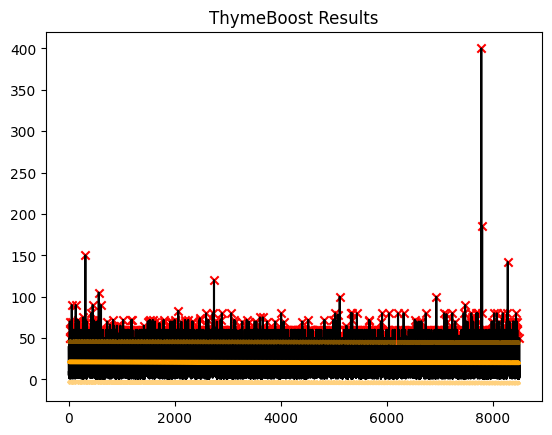

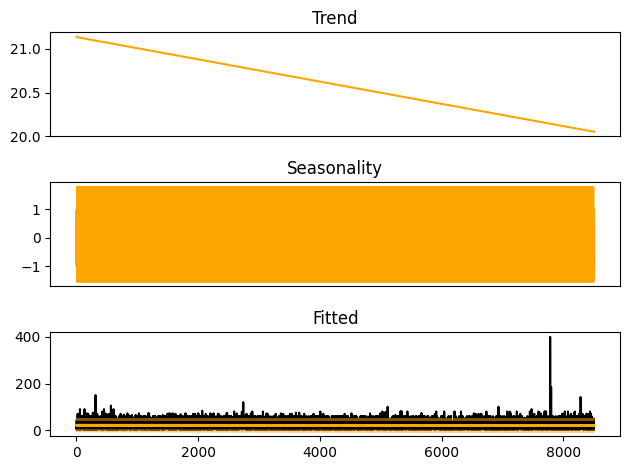

In [18]:
boosted_model.plot_results(output)
boosted_model.plot_components(output)


In [19]:
#Handling Outliers Using the Regularize Argument


output_r = boosted_model.fit(plastic1['QUANTITY'],
                           trend_estimator='linear',
                           seasonal_estimator='fourier',
                           seasonal_period=15,
                           global_cost='maicc',
                           fit_type='global',
                           seasonality_weights='regularize')


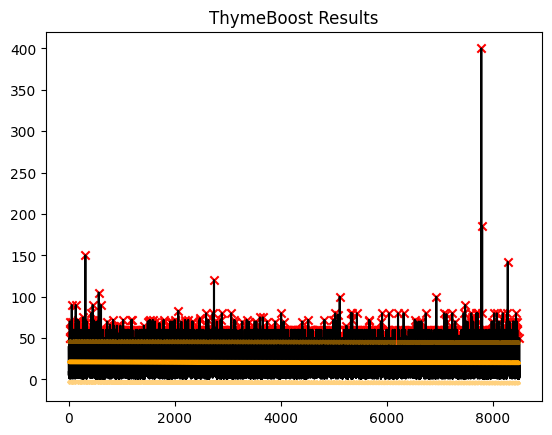

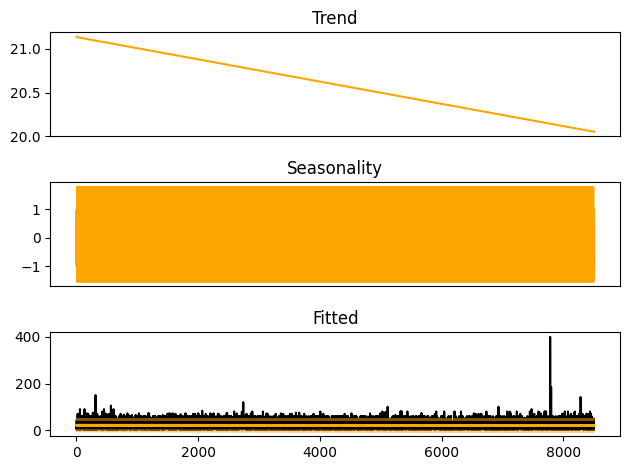

In [20]:
boosted_model.plot_results(output)

boosted_model.plot_components(output)

In [21]:
rmse_r = np.sqrt(np.mean((np.array(output_r['y'])-np.array(output_r['yhat']))**2))
rmse_r

19.12832884422416

In [22]:
###weight
weights = np.invert(output['outliers'].values) * 1

In [23]:
output_w = boosted_model.fit(plastic1['QUANTITY'],
                           trend_estimator='linear',
                           seasonal_estimator='fourier',
                           seasonal_period=15,
                           global_cost='maicc',
                           fit_type='global',
                           seasonality_weights=weights)


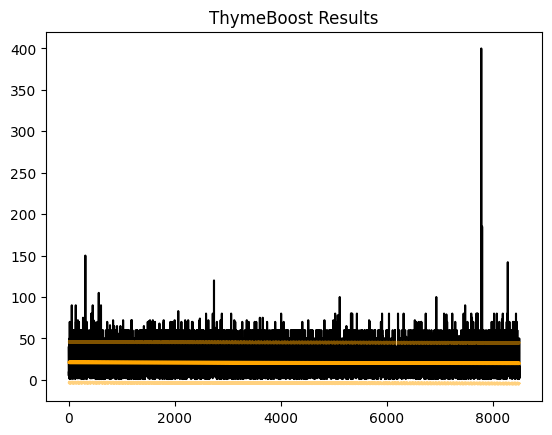

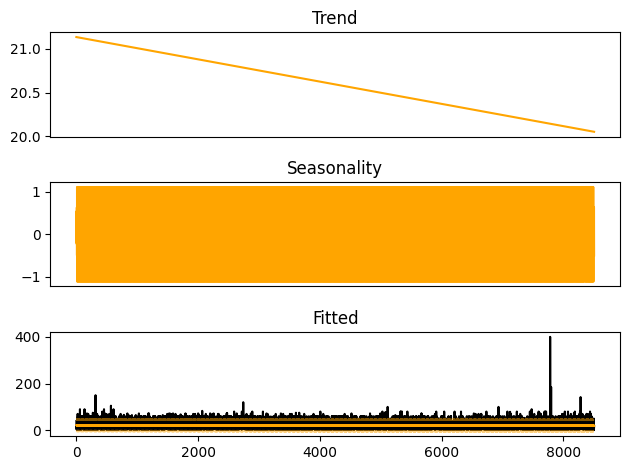

In [24]:
boosted_model.plot_results(output_w)
boosted_model.plot_components(output_w)

In [25]:
rmse_w = np.sqrt(np.mean((np.array(output_w['y'])-np.array(output_w['yhat']))**2))
rmse_w

19.11734224949377

In [26]:
plastic1 = plastic1.drop("QUANTITY",axis=1)

In [27]:
plastic1 = pd.concat([plastic1,output_w["yhat"]],axis=1)

In [28]:
#plastic1 = plastic1.rename({'yhat': 'QUANTITY'}, axis=1)

In [29]:
plastic1

,EFFECTIVE DATE,Customer/Vendor Name,Region,STATE,City,From WhsName,yhat
0,2021-11-01,37,1,6,27,3,21.159340
1,2021-11-01,37,1,6,27,3,20.973278
2,2021-11-01,8,1,9,4,3,20.937218
3,2021-11-01,75,1,9,35,3,21.674900
4,2021-11-01,76,1,9,35,3,21.465748
...,...,...,...,...,...,...,...
8499,2022-10-31,8,1,9,4,3,19.974798
8500,2022-10-31,45,2,5,21,8,19.818203
8501,2022-10-31,82,0,10,23,10,20.684263
8502,2022-10-31,43,2,5,1,12,19.911599


In [30]:
plastic1.shape

(8501, 7)

In [31]:
plastic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8501 entries, 0 to 8503
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EFFECTIVE DATE        8501 non-null   datetime64[ns]
 1   Customer/Vendor Name  8501 non-null   int32         
 2   Region                8501 non-null   int32         
 3   STATE                 8501 non-null   int32         
 4   City                  8501 non-null   int32         
 5   From WhsName          8501 non-null   int32         
 6   yhat                  8501 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(5)
memory usage: 365.3 KB


In [32]:
train_dates = pd.to_datetime(plastic1['EFFECTIVE DATE'])

In [33]:
#plastic1 = plastic1.convert_dtypes()
#plastic1["QUANTITY"] = plastic1["QUANTITY"].astype('int64')

In [34]:
#plastic1.info()

In [35]:
cols = list(plastic1)[1:7]
print(cols)

['Customer/Vendor Name', 'Region', 'STATE', 'City', 'From WhsName', 'yhat']


In [36]:
groupby_object = plastic1.groupby('Customer/Vendor Name')

In [37]:
plastic1 = groupby_object.sum()

In [38]:
plastic1

,Region,STATE,City,From WhsName,yhat
Customer/Vendor Name,,,,,
0,0,60,720,287,614.374927
1,26,78,52,90,534.725269
2,0,282,1128,1328,2904.869526
3,217,1953,868,651,4455.659541
4,2,5,28,12,20.603599
...,...,...,...,...,...
80,0,10,23,10,19.883665
81,28,70,252,168,293.495170
82,0,8980,20654,8477,18472.629975


In [39]:
#plastic1.to_excel("plastic1.xlsx")

In [40]:
import os
os.getcwd()

'C:\\Users\\aishw'

In [42]:
df_for_training = plastic1.astype(float)

In [43]:
df_for_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        85 non-null     float64
 1   STATE         85 non-null     float64
 2   City          85 non-null     float64
 3   From WhsName  85 non-null     float64
 4   yhat          85 non-null     float64
dtypes: float64(5)
memory usage: 4.0 KB


<AxesSubplot: xlabel='Customer/Vendor Name'>

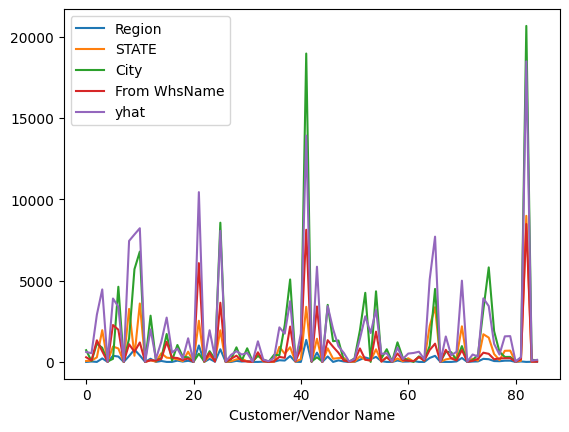

In [44]:
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()

In [45]:
df_for_training.head()

,Region,STATE,City,From WhsName,yhat
Customer/Vendor Name,,,,,
0,0.0,60.0,720.0,287.0,614.374927
1,26.0,78.0,52.0,90.0,534.725269
2,0.0,282.0,1128.0,1328.0,2904.869526
3,217.0,1953.0,868.0,651.0,4455.659541
4,2.0,5.0,28.0,12.0,20.603599


In [46]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [47]:
len(df_for_training_scaled)

85

In [48]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []


In [49]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 180  # Number of past days we want to use to predict the future.

In [50]:
#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (11786, 7)
#21644 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])

In [51]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [52]:
print('trainX shape == {}.'.format(trainX.shape))

trainX shape == (0,).


In [53]:
print('trainY shape == {}.'.format(trainY.shape))

trainY shape == (0,).


In [54]:
df_for_training_scaled

array([[-5.45382427e-01, -4.58829675e-01, -2.46919001e-01,
        -2.85539715e-01, -4.54615560e-01],
       [-4.32948177e-01, -4.44390088e-01, -4.47886002e-01,
        -4.17261319e-01, -4.79669036e-01],
       [-5.45382427e-01, -2.80741435e-01, -1.24172689e-01,
         4.10512013e-01,  2.65850181e-01],
       [ 3.93011124e-01,  1.05973356e+00, -2.02393378e-01,
        -4.21556332e-02,  7.53644859e-01],
       [-5.36733639e-01, -5.02950635e-01, -4.55106373e-01,
        -4.69415051e-01, -6.41383911e-01],
       [ 1.08923860e+00,  2.51116687e-01, -4.06669716e-01,
         1.03903134e+00,  5.77934218e-01],
       [ 8.81667674e-01,  1.54852774e-01,  9.26391334e-01,
         8.46463719e-01,  4.18615916e-01],
       [-5.45382427e-01, -5.05357233e-01, -4.61123349e-01,
        -4.71420964e-01, -6.41285284e-01],
       [ 1.02004829e+00,  2.10660362e+00, -2.79010720e-02,
         2.48701717e-01,  1.69217437e+00],
       [ 2.74115720e+00, -2.02125905e-01,  1.25130804e+00,
        -6.15461232e-02

In [55]:
trainX

array([], dtype=float64)

In [56]:
trainY

array([], dtype=float64)

In [57]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

IndexError: tuple index out of range

In [ ]:
# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
import pandas as pd

#Forecasting
#Start with the last day in training date and predict future..
n_future=180 #Redifining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

In [ ]:
forecast = model.predict(trainX[-n_future:])

In [ ]:
forecast

In [ ]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)

In [ ]:
forecast_copies

In [ ]:
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
y_pred_future

In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Qty':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [ ]:
df_forecast

In [ ]:
plastic1

In [ ]:
original = plastic1[['EFFECTIVE DATE','yhat']]

In [ ]:
original['EFFECTIVE DATE'] = pd.to_datetime(original['EFFECTIVE DATE'])
original = original.loc[original['EFFECTIVE DATE']>= '2021-11-01']

In [ ]:
sns.lineplot(original['EFFECTIVE DATE'],original['yhat'])


In [ ]:
sns.lineplot(df_forecast['Date'],original['yhat'])